In [11]:
# Victor
# Projet pour Evaluation ML
# Dataset utilisé : Spotify
# Source : https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks
# Période des données : 1921-2020

# **Imports et chargement des datasets**

In [12]:
import seaborn as sns
import pandas as pd
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings

# Import pour le labelencodeur et le split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import des différents algorithmes
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# GridSearch
from sklearn.model_selection import GridSearchCV

# Matrice de confusion
from sklearn.metrics import confusion_matrix

# Courbe Roc
from sklearn import metrics

# Pour ignorer les warnings
warnings.filterwarnings("ignore")

sns.set

labelencoder = preprocessing.LabelEncoder()

# Chargement des datasets
spotify = pd.read_csv(r"data/data_spotify.csv")
spotify_by_artist = pd.read_csv(r"data/data_spotify_by_artist.csv")
spotify_by_genres = pd.read_csv(r"data/data_spotify_by_genres.csv")
spotify_by_year = pd.read_csv(r"data/data_spotify_by_year.csv")
spotify_w_genres = pd.read_csv(r"data/data_spotify_w_genres.csv")

df = spotify
df_by_artist = spotify_by_artist
df_by_genres = spotify_by_genres
df_by_year = spotify_by_year
df_w_genres = spotify_w_genres

# **Fonctions**

In [9]:
# Fonction permettant de calculer l'accuracy en %
def accuracy(preds, Y):
  print(preds.shape, Y.shape)
  return ((preds == Y).sum() / len(Y) * 100)


# Affichage de la feature importance
def show_featuresImportance(X_train,feature_importances) :
    d = pd.DataFrame()
    # Ajout liste de nos features
    d['features'] = X_train.columns
    # Ajout liste des feature_importances
    d['pouvoir_predictif'] = feature_importances
    # Mettre nos features importances en pourcentage
    d['pouvoir_predictif'] = d['pouvoir_predictif'].apply(lambda v : v*100)
    # Tri des valeurs ordre décroissant
    d = d.sort_values(by='pouvoir_predictif', ascending=False)
    
    # Affichage graph
    sns.barplot(d['pouvoir_predictif'], d['features'])
    
    # Style du graphe
    fig = mp.pyplot.gcf()
    plt.title('Pouvoir predictif des features')
    fig.set_size_inches(20,6)
  

# **Présentation des datasets**

In [10]:
# Affichage des différents datasets
print(df.columns)
df.head()

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [ ]:
print(df_by_artist.columns)
df_by_artist.head()

Index(['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'count'],
      dtype='object')


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9


In [ ]:
print(df_by_year.columns)
df_by_year.head()

Index(['year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')


,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,0.351562,7,1
1,1922,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,0.138889,10,1
2,1923,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,5.727811,0,1
3,1924,0.935575,0.548654,188461.649789,0.347033,0.583955,0.237875,-14.202304,0.090210,120.653359,0.668574,0.603376,10,1
4,1925,0.965422,0.571890,184130.699620,0.264373,0.408893,0.243094,-14.516707,0.115457,115.671715,0.616430,2.707224,5,1


In [ ]:
print(df_by_genres.columns)
df_by_genres.head()

Index(['genres', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')


,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [ ]:
print(df_by_year.columns)
df_by_year.head()

Index(['year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')


,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,0.351562,7,1
1,1922,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,0.138889,10,1
2,1923,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,5.727811,0,1
3,1924,0.935575,0.548654,188461.649789,0.347033,0.583955,0.237875,-14.202304,0.090210,120.653359,0.668574,0.603376,10,1
4,1925,0.965422,0.571890,184130.699620,0.264373,0.408893,0.243094,-14.516707,0.115457,115.671715,0.616430,2.707224,5,1


In [ ]:
print(df_w_genres.columns)
df_w_genres.head()

Index(['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'count', 'genres'],
      dtype='object')


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


# **Nettoyage**


> Vérification de la présence des données de valeurs nulles



In [ ]:
# Comptage d'une éventuelle présence de valeurs nulles
df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [ ]:
# Comptage d'une éventuelle présence de valeurs nulles
df_by_artist.isnull().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

In [ ]:
# Comptage d'une éventuelle présence de valeurs nulles
df_by_genres.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [ ]:
# Comptage d'une éventuelle présence de valeurs nulles
df_w_genres.isnull().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
genres              0
dtype: int64

In [ ]:
# Comptage d'une éventuelle présence de valeurs nulles
df_by_year.isnull().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64


> S'il y avait la présence de valeurs nulles


In [ ]:
# Utilisation de dropna()

df = df.copy()
df = df.dropna()


# Drop les colonnes superflues sur le dataset principal

df.drop(["mode", "release_date"], axis=1, inplace=True)
df.head()


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,name,popularity,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928


# **Dataviz**

> Visualisation de la popularité (axe x) en fonction de la densité (axe y)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


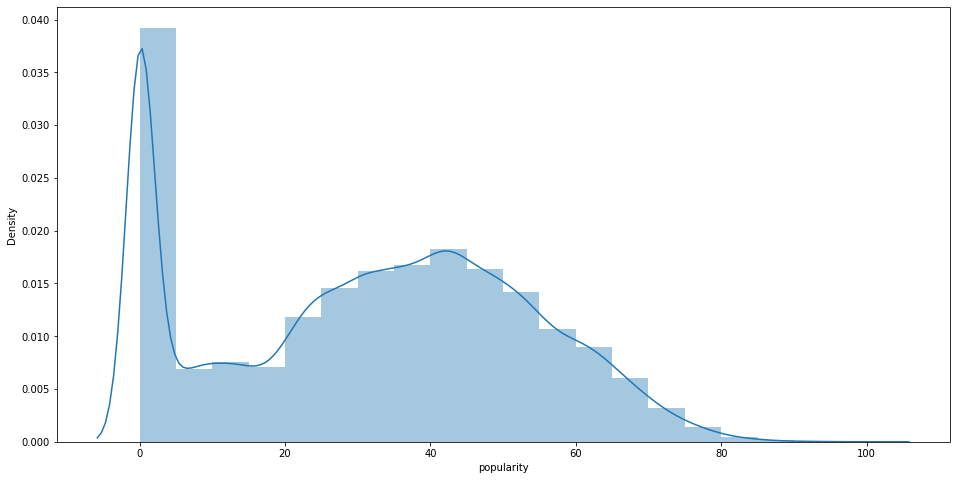

In [ ]:
plt.figure(figsize=(16, 8))
sns.distplot(df.popularity,bins=20)

On peut voir qu'une partie (presque 4% de l'échantillon) des musiques Spotify sont entre 0 et 5% de popularité, comparé aux reste de l'échantillon (par tranche de 5%)



> Boîte à moustache



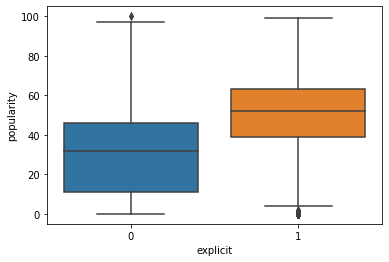

In [ ]:
# Une comparaison dans une boîte à moustache

sns.boxplot(data=df, x= "explicit", y="popularity")


> Heatmap








L'ensemble de données comprend de nombreuses fonctionnalités audio différentes des chansons. Certaines de ces caractéristiques peuvent être corrélées.

Utilisation de la méthode Corr de Pandas pour calculer la corrélation et utiliser une carte thermique pour les visualiser.

Selon la Heatmap, il existe une forte corrélation positive entre l'énergie et le volume. D'un autre côté, il semble y avoir une forte corrélation négative entre l'énergie et l'acoustique.

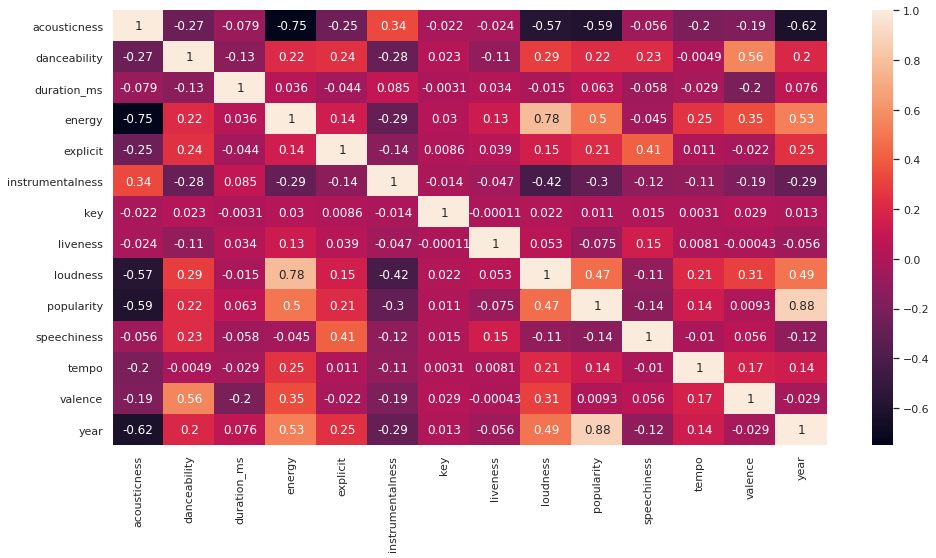

In [ ]:
# Heatmap de la source Spotify

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,100.000000,0.969000,244.091000,1.000000,2020.000000


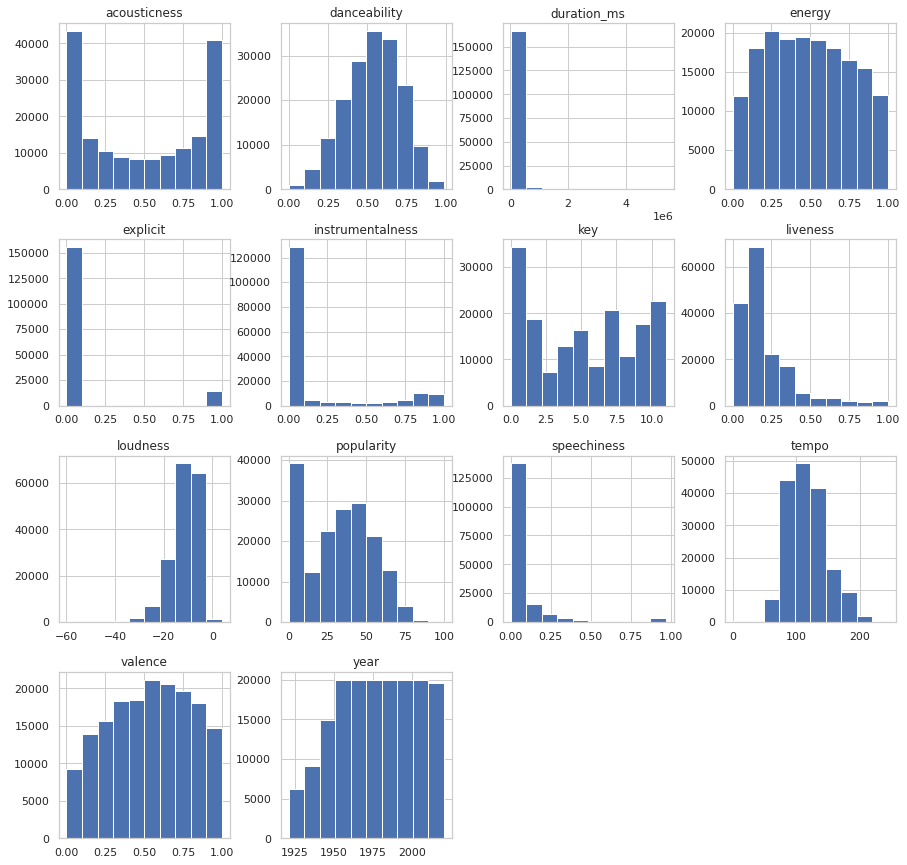

In [ ]:
# Rapide vue des datasets sous forme de graph

# dataset principal Spotify
df.hist(figsize=(15, 15))
plt.show()

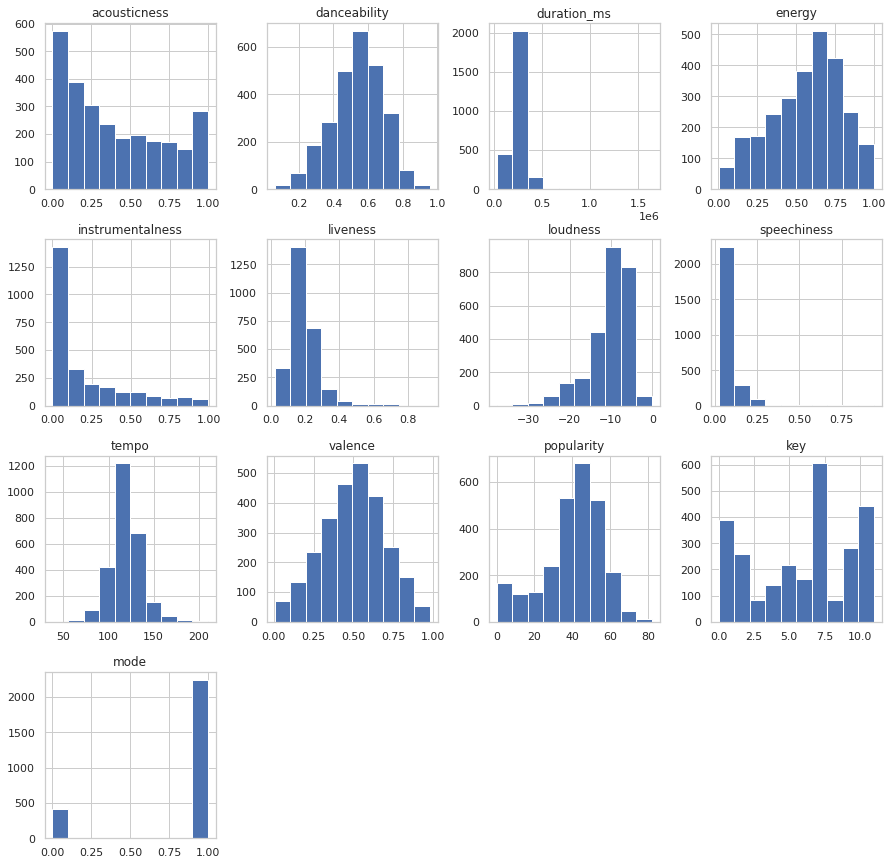

In [ ]:
# dataset Spotify par genre

df_by_genres.hist(figsize=(15, 15))
plt.show()

# **Model building**

In [ ]:
# Filtrage des colonnes pertinentes
# Aucune colonne n'est en format String

use_col = ['acousticness','danceability','loudness','popularity','duration_ms','energy','speechiness','valence']

# Filtrage sur 30000 données
df_mod = pd.read_csv(r"/content/drive/My Drive/data_spotify.csv", usecols=use_col, nrows=30000)

df_mod.head()

,acousticness,danceability,duration_ms,energy,loudness,popularity,speechiness,valence
0,0.995,0.708,158648,0.1950,-12.428,0,0.0506,0.7790
1,0.994,0.379,282133,0.0135,-28.454,0,0.0462,0.0767
2,0.604,0.749,104300,0.2200,-19.924,0,0.9290,0.8800
3,0.995,0.781,180760,0.1300,-14.734,0,0.0926,0.7200
4,0.990,0.210,687733,0.2040,-16.829,1,0.0424,0.0693


In [ ]:
# Split notre environnement de travail en 2 grandes parties : environnement prod (test) & environnement d'entrainement (train)
# On vérifie la shape de nos variables afin de s'assurer de possèder le bon nombre de colonnes et de lignes


X = df.drop(columns=['popularity', 'artists', 'id', 'name', 'year', 'release_date'])
y = df['popularity']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

print("Nombre d'échantillons de train dans le sample: ", x_train.shape)
print("Nombre d'échantillons dans l'ensemble de la validation: ", y_test.shape)

Nombre d'échantillons de train dans le sample:  (135927, 13)
Nombre d'échantillons dans l'ensemble de la validation:  (33982,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.3,random_state=2)

model = LogisticRegression(C=10, fit_intercept=False, max_iter=60, penalty='l2', random_state=100)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

print(accuracy(Y_pred, Y_test))

(118937,) (118937,)
16.024449918864608


In [56]:
from sklearn.svm import LinearSVC
show_featuresImportance(X_train, model.feature_importances_)



AttributeError: ignored

# **Features importance**



> Affichage en barplot



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

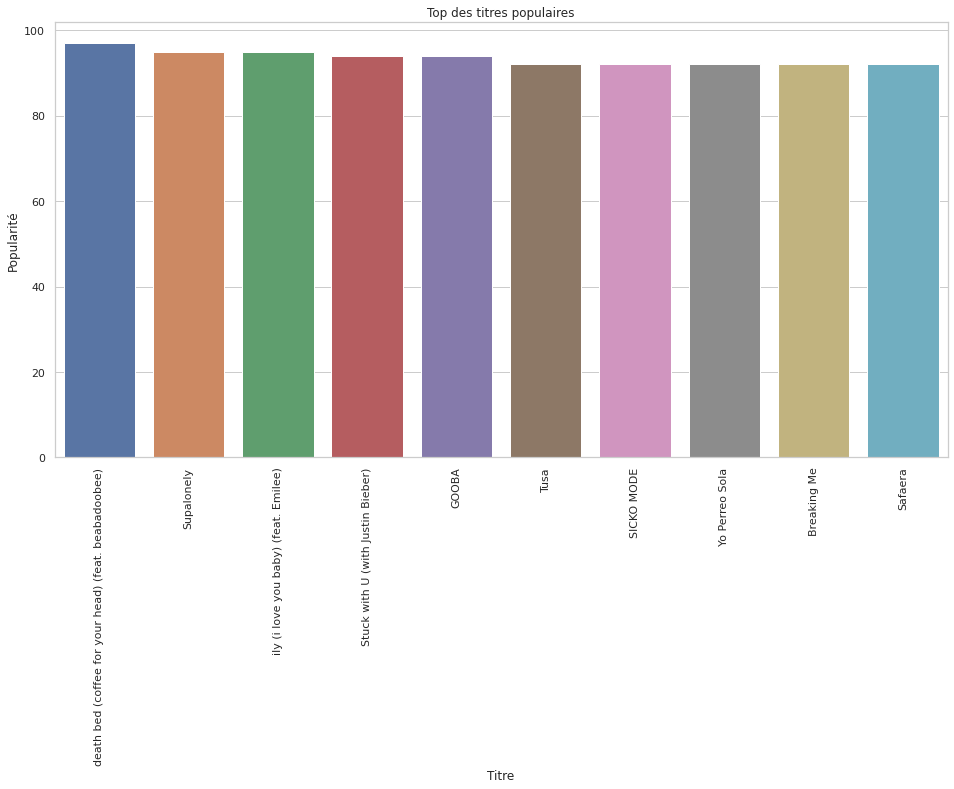

In [ ]:
# Top des titres les plus populaires depuis 1921

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top des titres populaires')
ax.set_ylabel('Popularité')
ax.set_xlabel('Titre')
plt.xticks(rotation = 90)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

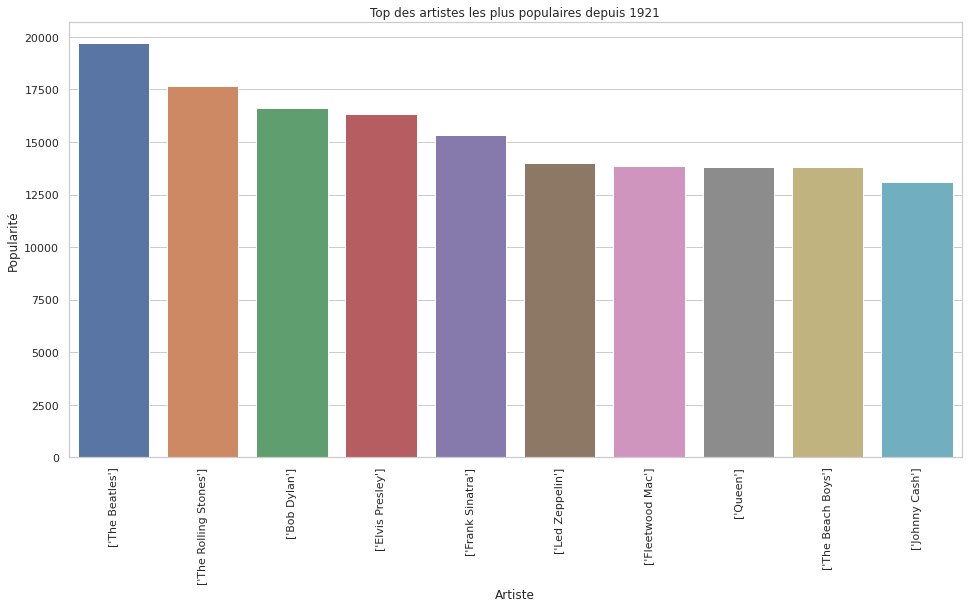

In [ ]:
# Top des artistes les plus populaires

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top des artistes les plus populaires depuis 1921')
ax.set_ylabel('Popularité')
ax.set_xlabel('Artiste')
plt.xticks(rotation = 90)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Année')

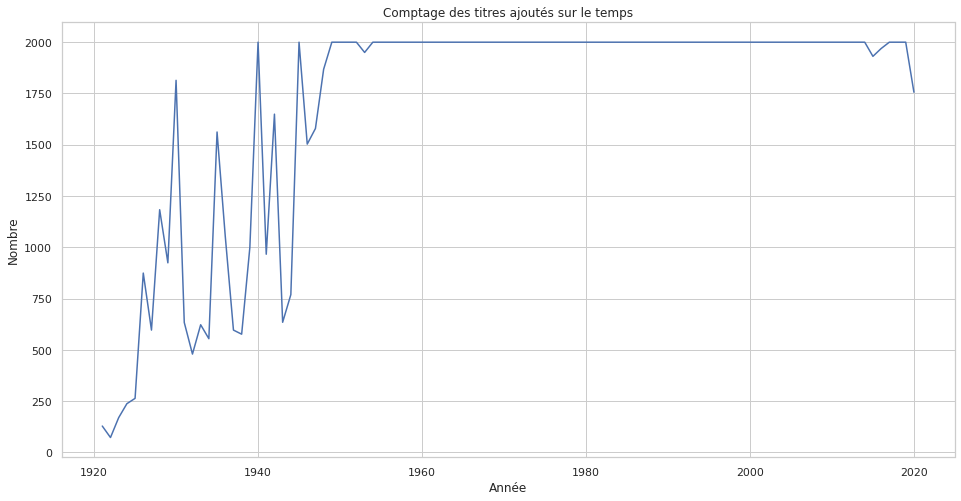

In [ ]:
# Comptage des titres ajoutés au long des années

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("year")["id"].count()
ax= sns.lineplot(x.index,x)
ax.set_title('Comptage des titres ajoutés sur le temps')
ax.set_ylabel('Nombre')
ax.set_xlabel('Année')


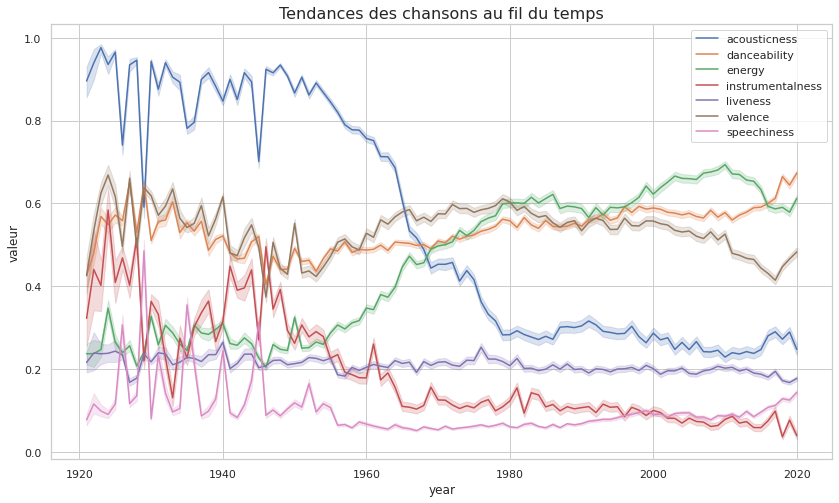

In [ ]:
# Evaluation des tendances musicaux sur le temps

plt.figure(figsize=(14,8))
plt.title("Tendances des chansons au fil du temps", fontdict={"fontsize": 16})

lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=df)


plt.ylabel("valeur")
plt.legend(lines)

On peut voir que l'acoustique est de moins en moins populaire depuis les années 1960. Les autres styles de musiques sont plutôt stables excepté le style énergique qui croit depuis les années 60.

Text(0.5, 0, 'Année')

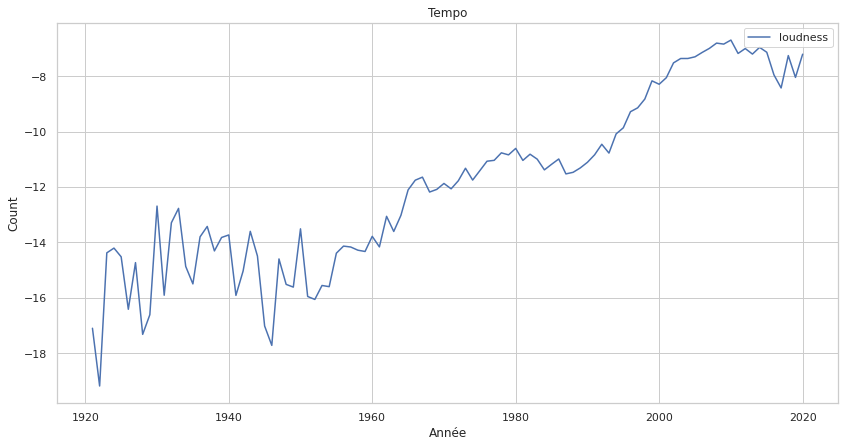

In [ ]:
# Evolution du volume dans les musiques

plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
columns = ["loudness"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Tempo')
ax.set_ylabel('Count')
ax.set_xlabel('Année')

On constate sur ce graphique que les chansonss sont de plus en plus intenses en niveau sonore, une augmentation régulière depuis les années 1960 jusqu'à 2010.

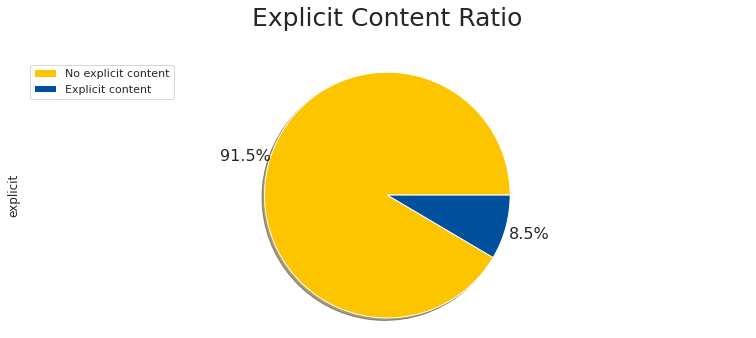

In [ ]:
# Camembert contenu Explicit

data = df

colors_list = ['#fdc500','#00509d']
mpl.rcParams['font.size'] = 16.0
ex = pd.DataFrame(data['explicit'].value_counts())
ex['explicit'].plot(kind='pie',
            figsize=(13, 5),
            autopct='%1.1f%%', 
            startangle=0,  
            shadow=True,       
            labels=None,    
            pctdistance=1.2, 
            colors=colors_list,
            )

plt.title('Explicit Content Ratio',y=1.1,fontsize=25) 
plt.axis('equal') 
plt.legend(labels=['No explicit content','Explicit content'], loc='upper left') 
plt.show()



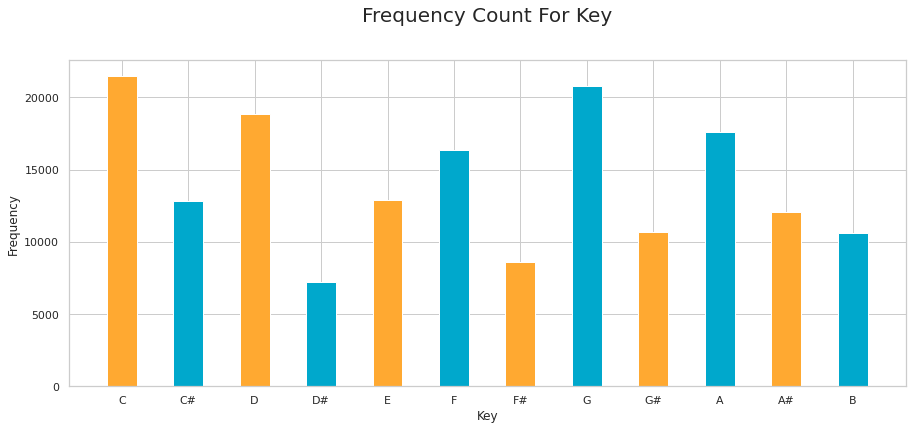

In [ ]:
# Les clés les plus utilisées

key = pd.DataFrame(data['key'].value_counts()).reset_index().sort_values('index')
key.replace({'index' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)
fig = plt.figure(figsize=(15,6))
plt.bar( key['index'],
         key['key'],
         width=0.45,
         color = ['#ffa931','#00a8cc'])
plt.title('Frequency Count For Key',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Frequency')
ax.axes.get_xaxis().set_visible(True)

On peut apercevoir que la Key C (Le son Do) est la plus utilisée, suivi de la Key G.